<a href="https://colab.research.google.com/github/l-fowler/neuromatch/blob/main/W1D4_DimensionalityReduction/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Geometric view of data

**Week 1, Day 4: Dimensionality Reduction**

**By Neuromatch Academy**

__Content creators:__ Alex Cayco Gajic, John Murray

__Content reviewers:__ Roozbeh Farhoudi, Matt Krause, Spiros Chavlis, Richard Gao, Michael Waskom, Siddharth Suresh, Natalie Schaworonkow, Ella Batty

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
# Tutorial Objectives

*Estimated timing of tutorial: 50 minutes*

In this notebook we'll explore how multivariate data can be represented in different orthonormal bases. This will help us build intuition that will be helpful in understanding PCA in the following tutorial. 

Overview:
 - Generate correlated multivariate data.
 - Define an arbitrary orthonormal basis. 
 - Project the data onto the new basis.

In [1]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

In [2]:
# @title Video 1: Geometric view of data
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1Af4y1R78w", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="THu9yHnpq9I", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

---
# Setup

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting Functions

def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  plot of their joint activity. The title indicates the sample correlation
  calculated from the data.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(X[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number')
  plt.ylabel('Neuron 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(X[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(X[:, 0], X[:, 1])[0, 1]))
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable
    W (numpy array of floats) :   Square matrix representing new orthonormal
                                  basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases.
  Similar to plot_data but with colors corresponding to projections onto
  basis 1 (red) and basis 2 (blue). The title indicates the sample correlation
  calculated from the data.

  Note that samples are re-sorted in ascending order for the first
  random variable.

  Args:
    Y (numpy array of floats):   Data matrix in new basis each column
                                 corresponds to a different random variable

  Returns:
    Nothing.
  """
  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.xlabel
  plt.ylabel('Projection \n basis vector 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(Y[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(Y[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()

---
# Section 1: Generate correlated multivariate data

In [6]:
# @title Video 2: Multivariate data
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1xz4y1D7ES", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="jcTq2PgU5Vw", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

This video describes the covariance matrix and the multivariate normal distribution.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

To gain intuition, we will first use a simple model to generate multivariate data. Specifically, we will draw random samples from a *bivariate normal distribution*. This is an extension of the one-dimensional normal distribution to two dimensions, in which each $x_i$ is marginally normal with mean $\mu_i$ and variance $\sigma_i^2$:

\begin{equation}
x_i \sim \mathcal{N}(\mu_i,\sigma_i^2).
\end{equation}

Additionally, the joint distribution for $x_1$ and $x_2$ has a specified correlation coefficient $\rho$. Recall that the correlation coefficient is a normalized version of the covariance, and ranges between -1 and +1:

\begin{equation}
\rho = \frac{\text{cov}(x_1, x_2)}{\sqrt{\sigma_1^2 \sigma_2^2}}.
\end{equation}

For simplicity, we will assume that the mean of each variable has already been subtracted, so that $\mu_i=0$ for both $i=1$ and $i=2$. The remaining parameters can be summarized in the covariance matrix, which for two dimensions has the following form:

\begin{equation}
{\bf \Sigma} = 
\begin{pmatrix}
 \text{var}(x_1) & \text{cov}(x_1,x_2) \\
 \text{cov}(x_1,x_2) &\text{var}(x_2)
\end{pmatrix}.
\end{equation}

In general, $\bf \Sigma$ is a symmetric matrix with the variances $\text{var}(x_i) = \sigma_i^2$ on the diagonal, and the covariances on the off-diagonal. Later, we will see that the covariance matrix plays a key role in PCA.

</details>

## Coding Exercise 1: Draw samples from a distribution

We have provided code to draw random samples from a zero-mean bivariate normal distribution with a specified covariance matrix (`get_data`). Throughout this tutorial, we'll imagine these samples represent the activity (firing rates) of two recorded neurons on different trials. Fill in the function below to calculate the covariance matrix given the desired variances and correlation coefficient. The covariance can be found by rearranging the equation above:

\begin{equation}
\text{cov}(x_1,x_2) = \rho \sqrt{\sigma_1^2 \sigma_2^2}.
\end{equation}

In [7]:
# @markdown Execute this cell to get helper function `get_data`

def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.

  Note that samples are sorted in ascending order for the first random variable

  Args:
    cov_matrix (numpy array of floats): desired covariance matrix

  Returns:
    (numpy array of floats) : samples from the bivariate Gaussian, with each
                              column corresponding to a different random
                              variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]

  return X

help(get_data)

Help on function get_data in module __main__:

get_data(cov_matrix)
    Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.
    
    Note that samples are sorted in ascending order for the first random variable
    
    Args:
      cov_matrix (numpy array of floats): desired covariance matrix
    
    Returns:
      (numpy array of floats) : samples from the bivariate Gaussian, with each
                                column corresponding to a different random
                                variable



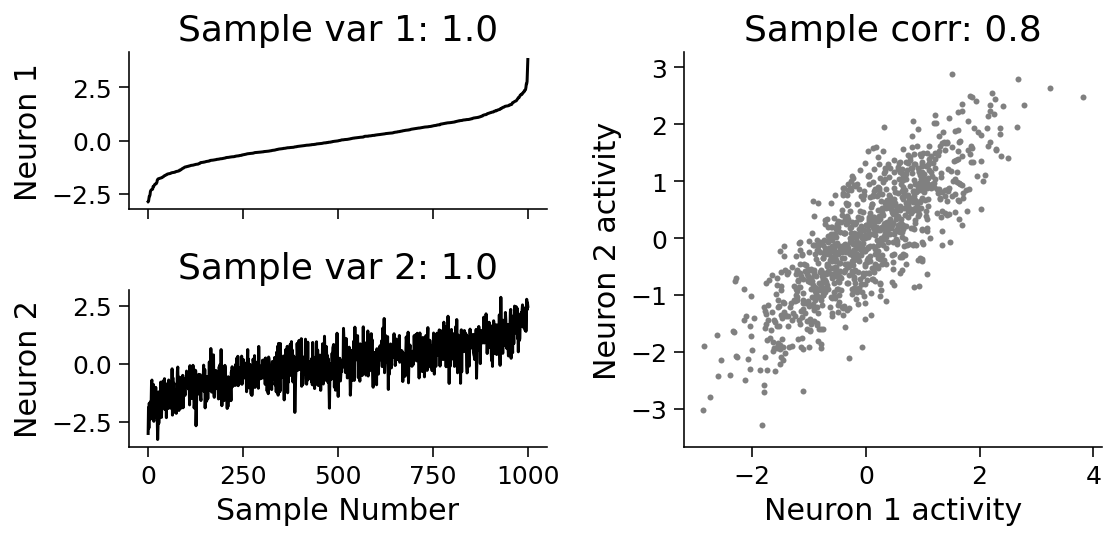

In [8]:
def calculate_cov_matrix(var_1, var_2, corr_coef):
  """
  Calculates the covariance matrix based on the variances and correlation
  coefficient.

  Args:
    var_1 (scalar)          : variance of the first random variable
    var_2 (scalar)          : variance of the second random variable
    corr_coef (scalar)      : correlation coefficient

  Returns:
    (numpy array of floats) : covariance matrix
  """

  #################################################
  ## TODO for students: calculate the covariance matrix
  # Fill out function and remove
  # raise NotImplementedError("Student exercise: calculate the covariance matrix!")
  #################################################

  # Calculate the covariance from the variances and correlation
  cov = corr_coef * np.sqrt(var_1 * var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

# Compute covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)

# Generate data with this covariance matrix
X = get_data(cov_matrix)

# Visualize
plot_data(X)

## Interactive Demo 1: Correlation effect on data

We'll use the function you just completed but now we can change the correlation coefficient via slider. You should get a feel for how changing the correlation coefficient affects the geometry of the simulated data.

1.   What effect do negative correlation coefficient values have?
2.   What correlation coefficient results in a circular data cloud?


Note that we sort the samples according to neuron 1's firing rate, meaning the plot of neuron 1 firing rate over sample number looks clean and pretty unchanging when compared to neuron 2.


In [9]:
# @markdown Execute this cell to enable widget

def _calculate_cov_matrix(var_1, var_2, corr_coef):

  # Calculate the covariance from the variances and correlation
  cov = corr_coef * np.sqrt(var_1 * var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


@widgets.interact(corr_coef = widgets.FloatSlider(value=.2, min=-1, max=1, step=0.1))
def visualize_correlated_data(corr_coef=0):
  variance_1 = 1
  variance_2 = 1

  # Compute covariance matrix
  cov_matrix = _calculate_cov_matrix(variance_1, variance_2, corr_coef)

  # Generate data with this covariance matrix
  X = get_data(cov_matrix)

  # Visualize
  plot_data(X)

interactive(children=(FloatSlider(value=0.2, description='corr_coef', max=1.0, min=-1.0), Output()), _dom_clas…

In [10]:
# to_remove explanation
"""
1) Negative correlation coefficients reverse the direction of the relationship: now higher neuron 1
activities are associated with lower neuron 2 activities.

2) A correlation coefficient of 0 (no correlation) results in a circular looking data cloud.
""";

---
# Section 2: Define a new orthonormal basis

*Estimated timing to here from start of tutorial: 20 min*


In [11]:
# @title Video 3: Orthonormal bases
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1wT4y1E71g", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="PC1RZELnrIg", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

This video shows that data can be represented in many ways using different bases. It also explains how to check if your favorite basis is orthonormal.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

Next, we will define a new orthonormal basis of vectors ${\bf u} = [u_1,u_2]$ and ${\bf w} = [w_1,w_2]$. As we learned in the video, two vectors are orthonormal if: 

1. They are orthogonal (i.e., their dot product is zero):

\begin{equation}
{\bf u\cdot w} = u_1 w_1 + u_2 w_2 = 0
\end{equation}

2. They have unit length:

\begin{equation}
||{\bf u}|| = ||{\bf w} || = 1
\end{equation}

</details>

In two dimensions, it is easy to make an arbitrary orthonormal basis. All we need is a random vector ${\bf u}$, which we have normalized. If we now define the second basis vector to be ${\bf w} = [-u_2,u_1]$, we can check that both conditions are satisfied: 

\begin{equation}
{\bf u\cdot w} = - u_1 u_2 + u_2 u_1 = 0
\end{equation}

and 

\begin{equation}
{|| {\bf w} ||} = \sqrt{(-u_2)^2 + u_1^2} = \sqrt{u_1^2 + u_2^2} = 1,
\end{equation}

where we used the fact that ${\bf u}$ is normalized. So, with an arbitrary input vector, we can define an orthonormal basis, which we will write in matrix by stacking the basis vectors horizontally:

\begin{equation}
{{\bf W} } =
\begin{pmatrix}
 u_1 & w_1 \\
 u_2 & w_2
\end{pmatrix}.
\end{equation}

## Coding Exercise 2: Find an orthonormal basis

In this exercise you will fill in the function below to define an orthonormal basis, given a single arbitrary 2-dimensional vector as an input.

**Steps**
* Modify the function `define_orthonormal_basis` to first normalize the first basis vector $\bf u$.
* Then complete the function by finding a basis vector $\bf w$ that is orthogonal to $\bf u$.
* Test the function using initial basis vector ${\bf u} = [3,1]$. Plot the resulting basis vectors on top of the data scatter plot using the function `plot_basis_vectors`. (For the data, use  $\sigma_1^2 =1$, $\sigma_2^2 =1$, and $\rho = .8$).

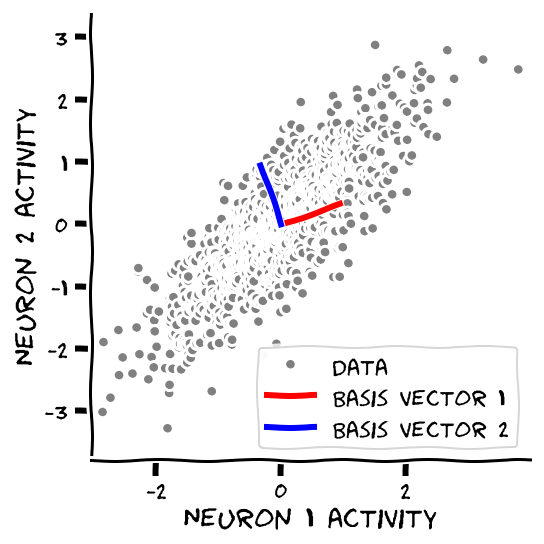

In [12]:
def define_orthonormal_basis(u):
  """
  Calculates an orthonormal basis given an arbitrary vector u.

  Args:
    u (numpy array of floats) : arbitrary 2-dimensional vector used for new
                                basis

  Returns:
    (numpy array of floats)   : new orthonormal basis
                                columns correspond to basis vectors
  """

  #################################################
  ## TODO for students: calculate the orthonormal basis
  # Fill out function and remove
  # raise NotImplementedError("Student exercise: implement the orthonormal basis function")
  #################################################

  # Normalize vector u
  u = u / np.sqrt(u[0] ** 2 + u[1] ** 2)

  # Calculate vector w that is orthogonal to w
  w = np.array([-u[1], u[0]])

  # Put in matrix form
  W = np.column_stack([u, w])
  
  return W


# Set up parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8
u = np.array([3, 1])

# Compute covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)

# Generate data
X = get_data(cov_matrix)

# Get orthonomal basis
W = define_orthonormal_basis(u)

# Visualize
with plt.xkcd():
  plot_basis_vectors(X, W)

---
# Section 3: Project data onto new basis

*Estimated timing to here from start of tutorial: 35 min*

In [14]:
# @title Video 4: Change of basis
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1LK411J7NQ", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="Mj6BRQPKKUc", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

Finally, we will express our data in the new basis that we have just found. Since $\bf W$ is orthonormal, we can project the data into our new basis using simple matrix multiplication :

\begin{equation}
{\bf Y = X W}.
\end{equation}

We will explore the geometry of the transformed data $\bf Y$ as we vary the choice of basis.

## Coding Exercise 3: Change to orthonormal basis
In this exercise you will fill in the function below to change data to an orthonormal basis.

**Steps**
* Complete the function `change_of_basis` to project the data onto the new basis.
* Plot the projected data using the function `plot_data_new_basis`. 
* What happens to the correlation coefficient in the new basis? Does it increase or decrease? 
* What happens to variance? 



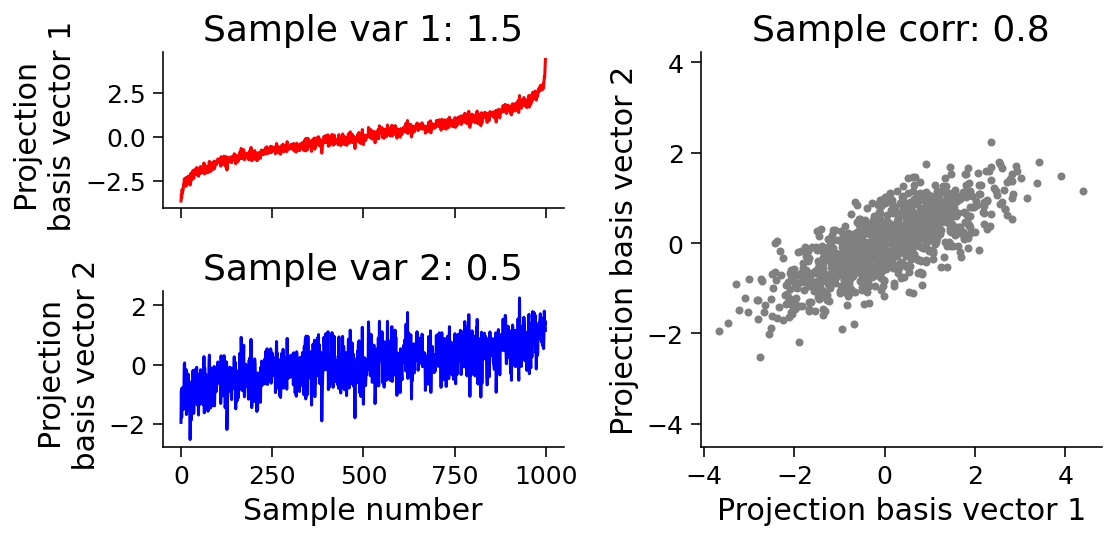

In [15]:
def change_of_basis(X, W):
  """
  Projects data onto new basis W.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)    : Data matrix expressed in new basis
  """

  #################################################
  ## TODO for students: project the data onto a new basis W
  # Fill out function and remove
  # raise NotImplementedError("Student exercise: implement change of basis")
  #################################################

  # Project data onto new basis described by W
  Y = X @ W

  return Y


# Project data to new basis
Y = change_of_basis(X, W)

# Visualize
plot_data_new_basis(Y)

## Interactive Demo 3: Play with the basis vectors
To see what happens to the correlation as we change the basis vectors, run the cell below. The parameter $\theta$ controls the angle of $\bf u$ in degrees. Use the slider to rotate the basis vectors. 



1.   What happens to the projected data as you rotate the basis? 
2.   How does the correlation coefficient change? How does the variance of the projection onto each basis vector change?
3.   Are you able to find a basis in which the projected data is **uncorrelated**?

In [16]:
# @markdown Make sure you execute this cell to enable the widget!

def refresh(theta=0):
  u = np.array([1, np.tan(theta * np.pi / 180)])
  W = define_orthonormal_basis(u)
  Y = change_of_basis(X, W)
  plot_basis_vectors(X, W)
  plot_data_new_basis(Y)


_ = widgets.interact(refresh, theta=(0, 90, 5))

interactive(children=(IntSlider(value=0, description='theta', max=90, step=5), Output()), _dom_classes=('widge…

In [17]:
# to_remove explanation
"""
1) As you rotate the basis vectors, the look of the cloud of projected data changes.
Specifically, the correlations and variances of the projected data change.

2) As the angle increases, the correlation coefficient decreases, goes to 0, then starts
to become negative. It changes from 0.8 to -.8 when the angle is changed by 90 degrees.

With theta of 0, the data projected onto the two basis vectors has equal variances of 1.
As theta increases, these variances become unequal: the projected data has larger and larger variance
for basis vector 1 and smaller variance for basis vector 2. Past theta of 45, the trend reverses and
the variances start becoming more similar.

3) If theta is 45 degrees, the projected data is uncorrelated.
""";

---
# Summary

*Estimated timing of tutorial: 50 minutes*

- In this tutorial, we learned that multivariate data can be visualized as a cloud of points in a high-dimensional vector space. The geometry of this cloud is shaped by the covariance matrix.

- Multivariate data can be represented in a new orthonormal basis using the dot product. These new basis vectors correspond to specific mixtures of the original variables - for example, in neuroscience, they could represent different ratios of activation  across a population of neurons.

- The projected data (after transforming into the new basis) will generally have a different geometry from the original data. In particular, taking basis vectors that are aligned with the spread of cloud of points decorrelates the data.

* These concepts - covariance, projections, and orthonormal bases - are key for understanding PCA, which will be our focus in the next tutorial.

---
# Notation

\begin{align}
x_i &\quad \text{data point for dimension } i\\
\mu_i &\quad \text{mean along dimension } i\\
\sigma_i^2 &\quad \text{variance along dimension } i \\
\bf u, \bf w &\quad \text{orthonormal basis vectors}\\
\rho &\quad \text{correlation coefficient}\\
\bf \Sigma &\quad \text{covariance matrix}\\
\bf X &\quad \text{original data matrix}\\
\bf W &\quad \text{projection matrix}\\
\bf Y &\quad \text{transformed data}\\
\end{align}